In [1]:
tpath = r'C:\Users\KIIT\drowsiness\archive\TrainingSet'
vpath = r'C:\Users\KIIT\drowsiness\archive\TestSet'

In [1]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TrainingSet\TrainingSet"

# Initialize lists to store images and labels
X = []
Y = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        if class_name.lower() == "closed":  # Check if the class is "Closed"
            label = 1  # Assign label 1 for "Closed"
        elif class_name.lower() == "opened":  # Check if the class is "Opened"
            label = 0  # Assign label 0 for "Opened"
        else:
            continue  # Skip processing if the class name doesn't match
        print(f"Processing class: {class_name}, label: {label}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X.append(img)  # Append image to X
                Y.append(label)  # Append label to Y
            else:
                print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Verify the contents of Y
print("Contents of Y:")
print(Y)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
Y = label_encoder.fit_transform(Y)

# Print the shape of Y
print("Shape of Y:", Y.shape)

# Print the first label after encoding
print("First label after encoding:", Y[0])

# Print the unique classes in Y
print("Unique classes in Y:", set(Y))


Processing class: Closed, label: 1
Processing class: Opened, label: 0
Contents of Y:
[1 1 1 ... 0 0 0]
Shape of Y: (1704,)
First label after encoding: 1
Unique classes in Y: {0, 1}


In [3]:
import cv2
import os
import numpy as np

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TrainingSet\TrainingSet"

# Initialize lists to store images and labels
X = []
Y = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        label = 1 if class_name == "closed" else 0  # Assign label: 1 for closed eyes, 0 for open eyes
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X.append(img)  # Append image to X
                Y.append(label)  # Append label to Y

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print the number of samples
print("Number of samples in X:", len(X))
print("Number of samples in Y:", len(Y))
print("Shape of first image in X:", X[0].shape)


Number of samples in X: 1704
Number of samples in Y: 1704
Shape of first image in X: (32, 32, 3)


In [4]:
X = list(X)
Y = list(Y)
print(len(X))
print(len(Y))

1704
1704


In [5]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(1704, 32, 32, 3)
(1704,)


Processing class: Closed, label: 1
Processing class: Opened, label: 0
Contents of Y:
[1 1 1 ... 0 0 0]
Number of samples with closed eyes: 880
Number of samples with open eyes: 824


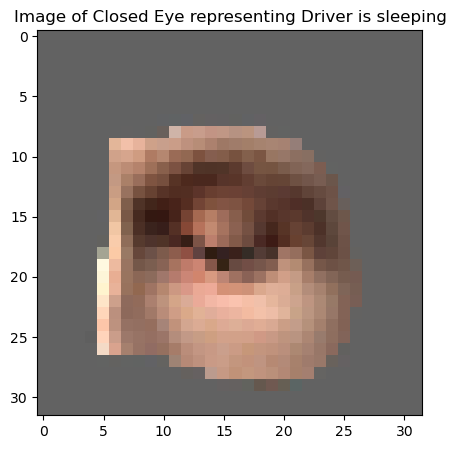

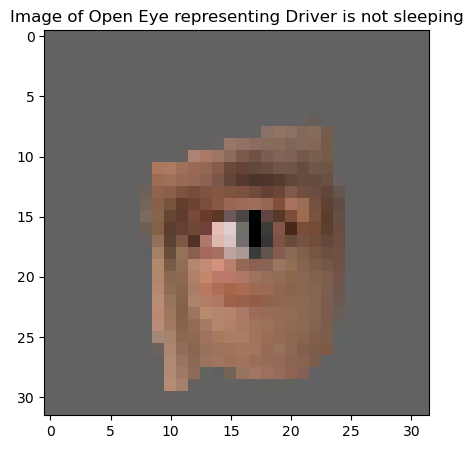

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TrainingSet\TrainingSet"

# Initialize lists to store images and labels
X = []
Y = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        label = 1 if class_name.lower() == "closed" else 0  # Assign label: 1 for "closed", 0 for "open"
        print(f"Processing class: {class_name}, label: {label}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X.append(img)  # Append image to X
                Y.append(label)  # Append label to Y
            else:
                print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Verify the contents of Y
print("Contents of Y:")
print(Y)

# Check the number of samples in each class
num_closed = np.sum(Y == 1)
num_open = np.sum(Y == 0)
print(f"Number of samples with closed eyes: {num_closed}")
print(f"Number of samples with open eyes: {num_open}")

# Visualize an image from each class
figure1 = plt.figure(figsize=(5, 5))
idx_closed = np.where(Y == 1)[0]  # Get indices of samples with closed eyes
if len(idx_closed) > 0:
    img_closed = X[idx_closed[0]]  # Get the first image with closed eyes
    plt.imshow(img_closed)
    plt.title('Image of Closed Eye representing Driver is sleeping')
else:
    print("No images found with closed eyes.")

figure2 = plt.figure(figsize=(5, 5))
idx_open = np.where(Y == 0)[0]  # Get indices of samples with open eyes
if len(idx_open) > 0:
    img_open = X[idx_open[0]]  # Get the first image with open eyes
    plt.imshow(img_open)
    plt.title('Image of Open Eye representing Driver is not sleeping')
else:
    print("No images found with open eyes.")

plt.show()


Label Counts in Training Dataset:
Label 0: 824 samples
Label 1: 880 samples


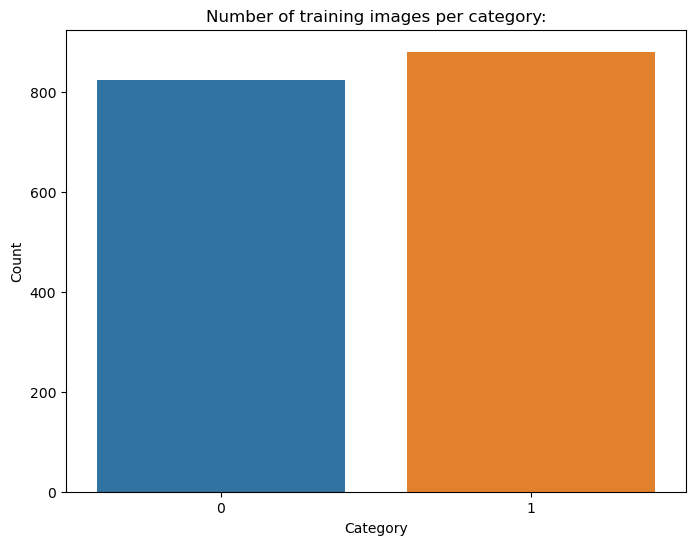

In [7]:
# Assuming you have defined unique_train and count as follows:
unique_train, count = np.unique(Y, return_counts=True)

print("Label Counts in Training Dataset:")
for label, cnt in zip(unique_train, count):
    print(f"Label {label}: {cnt} samples")

plt.figure(figsize=(8, 6))
sns.barplot(x=unique_train, y=count).set_title("Number of training images per category:")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [8]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TestSet\TestSet"
# Initialize lists to store images and labels
X_test = []
Y_test = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        if class_name.lower() == "closed":  # Check if the class is "Closed"
            label = 1  # Assign label 1 for "Closed"
        elif class_name.lower() == "opened":  # Check if the class is "Opened"
            label = 0  # Assign label 0 for "Opened"
        else:
            continue  # Skip processing if the class name doesn't match
        print(f"Processing class: {class_name}, label: {label}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X_test.append(img)  # Append image to X
                Y_test.append(label)  # Append label to Y
            else:
                print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Verify the contents of Y
print("Contents of Y:")
print(Y_test)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
Y_test = label_encoder.fit_transform(Y_test)

# Print the shape of Y
print("Shape of Y:", Y_test.shape)

# Print the first label after encoding
print("First label after encoding:", Y_test[0])

# Print the unique classes in Y
print("Unique classes in Y:", set(Y_test))


Processing class: Closed, label: 1
Processing class: Opened, label: 0
Contents of Y:
[1 1 1 ... 0 0 0]
Shape of Y: (4232,)
First label after encoding: 1
Unique classes in Y: {0, 1}


In [9]:
import cv2
import os
import numpy as np

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TestSet\TestSet"

# Initialize lists to store images and labels
X_test = []
Y_test = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        label = 1 if class_name == "closed" else 0  # Assign label: 1 for closed eyes, 0 for open eyes
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X_test.append(img)  # Append image to X
                Y_test.append(label)  # Append label to Y

# Convert lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Print the number of samples
print("Number of samples in X:", len(X_test))
print("Number of samples in Y:", len(Y_test))
print("Shape of first image in X:", X_test[0].shape)


Number of samples in X: 4232
Number of samples in Y: 4232
Shape of first image in X: (32, 32, 3)


In [10]:
X_test = list(X_test)
Y_test = list(Y_test)
print(len(X_test))
print(len(Y_test))

4232
4232


In [11]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(4232, 32, 32, 3)
(4232,)


Processing class: Closed, label: 1
Processing class: Opened, label: 0
Contents of Y:
[1 1 1 ... 0 0 0]
Number of samples with closed eyes: 2190
Number of samples with open eyes: 2042


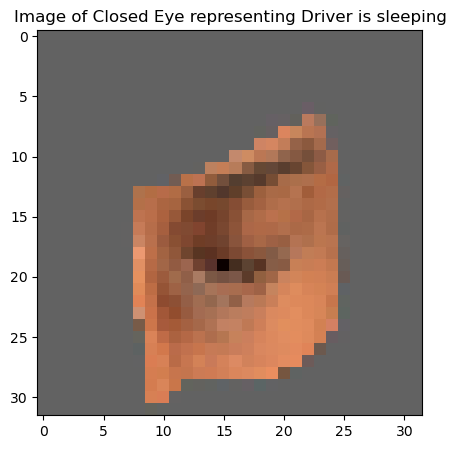

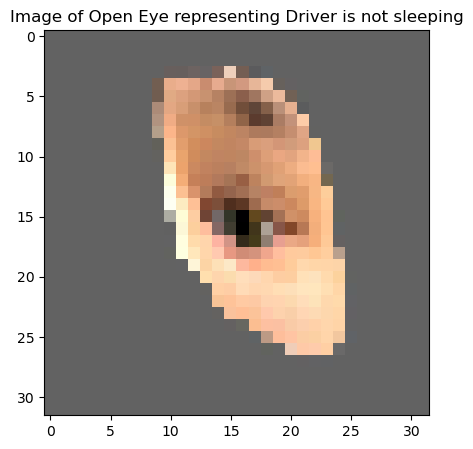

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TestSet\TestSet"

# Initialize lists to store images and labels
X_test = []
Y_test = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        label = 1 if class_name.lower() == "closed" else 0  # Assign label: 1 for "closed", 0 for "open"
        print(f"Processing class: {class_name}, label: {label}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X_test.append(img)  # Append image to X
                Y_test.append(label)  # Append label to Y
            else:
                print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Verify the contents of Y
print("Contents of Y:")
print(Y_test)

# Check the number of samples in each class
num_closed = np.sum(Y_test == 1)
num_open = np.sum(Y_test == 0)
print(f"Number of samples with closed eyes: {num_closed}")
print(f"Number of samples with open eyes: {num_open}")

# Visualize an image from each class
figure1 = plt.figure(figsize=(5, 5))
idx_closed = np.where(Y_test == 1)[0]  # Get indices of samples with closed eyes
if len(idx_closed) > 0:
    img_closed = X_test[idx_closed[0]]  # Get the first image with closed eyes
    plt.imshow(img_closed)
    plt.title('Image of Closed Eye representing Driver is sleeping')
else:
    print("No images found with closed eyes.")

figure2 = plt.figure(figsize=(5, 5))
idx_open = np.where(Y_test == 0)[0]  # Get indices of samples with open eyes
if len(idx_open) > 0:
    img_open = X_test[idx_open[0]]  # Get the first image with open eyes
    plt.imshow(img_open)
    plt.title('Image of Open Eye representing Driver is not sleeping')
else:
    print("No images found with open eyes.")

plt.show()


Label Counts in Training Dataset:
Label 0: 2042 samples
Label 1: 2190 samples


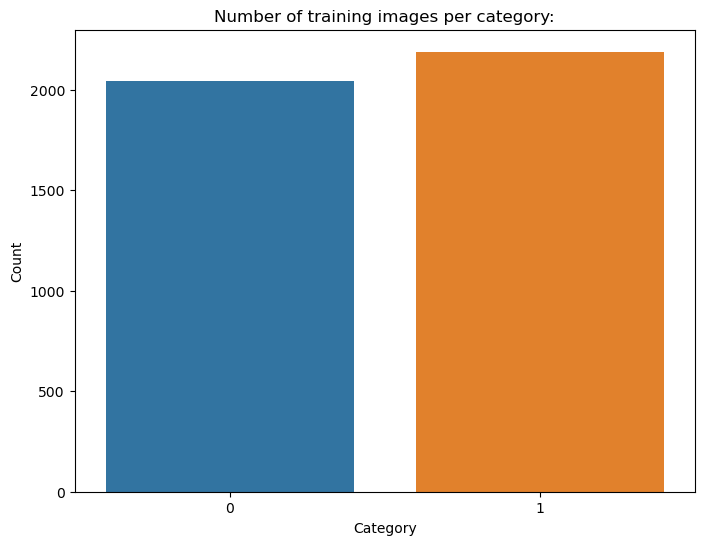

In [14]:
unique_test, count = np.unique(Y_test, return_counts=True)

print("Label Counts in Training Dataset:")
for label, cnt in zip(unique_train, count):
    print(f"Label {label}: {cnt} samples")

plt.figure(figsize=(8, 6))
sns.barplot(x=unique_test, y=count).set_title("Number of training images per category:")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


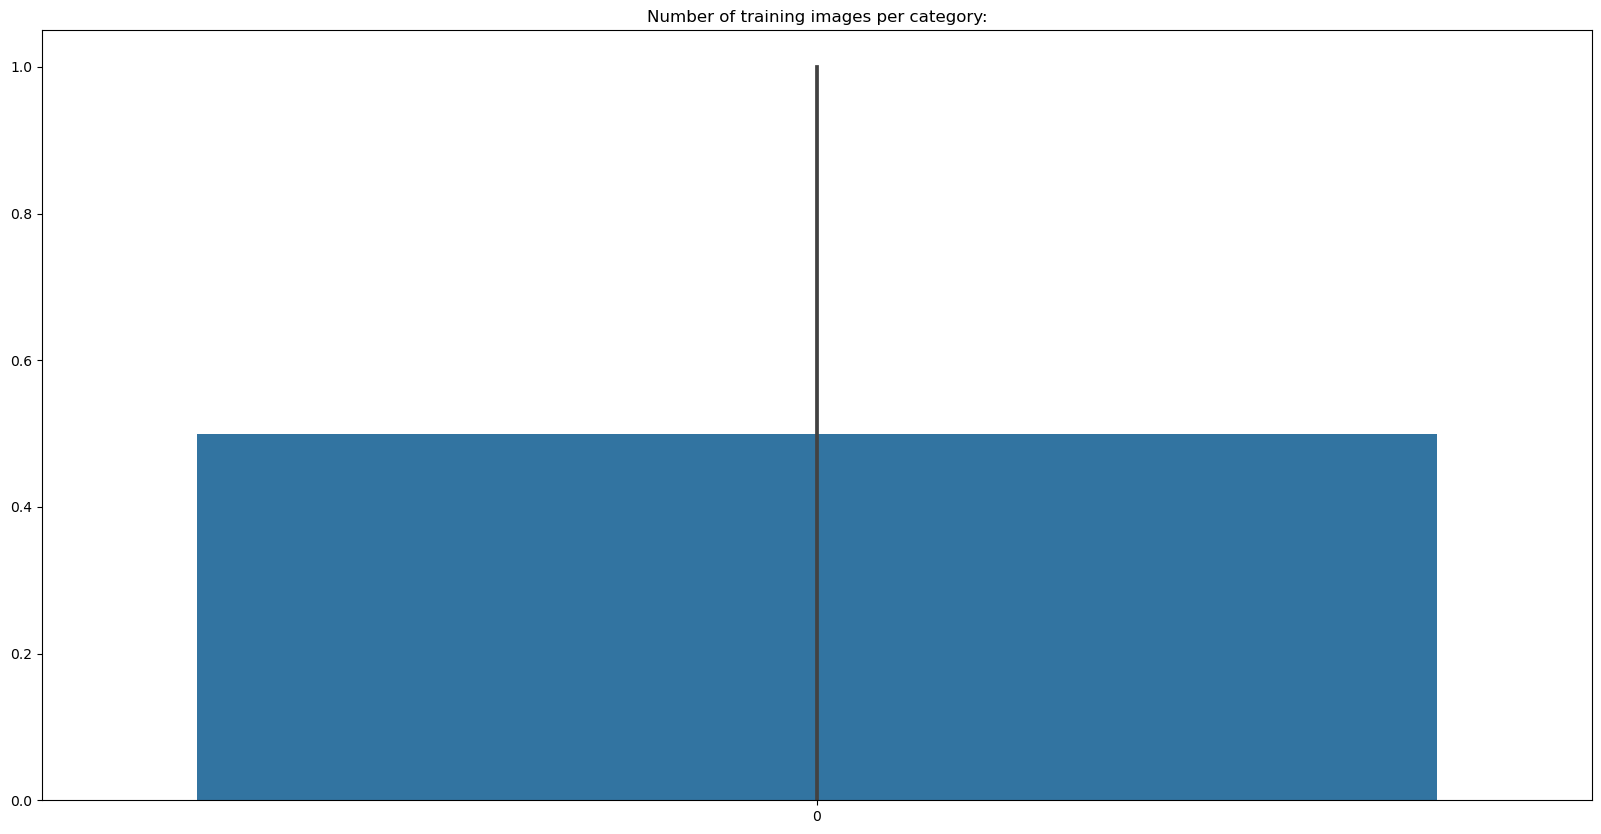

In [13]:
unique_test, count_test = np.unique(Y_test, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(unique_test).set_title("Number of training images per category:")#count_test
plt.show()

In [18]:
def driver_drowsiness_detection_model(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv6', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv7', activation='relu',
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))


    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))

    optimizer = Adam(0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, BatchNormalization

def driver_drowsiness_detection_model(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu',
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(BatchNormalization())
    # Add more layers as needed
    return model

model = driver_drowsiness_detection_model(input_shape=(32, 32, 3))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
Total params: 1024 (4.00 KB)
Trainable params: 960 (3.75 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
aug = ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.15,
                         horizontal_flip=True,
                         fill_mode="nearest")


In [23]:
import tensorflow as tf

# Set TensorFlow logging verbosity to see more details
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Your TensorFlow code causing the graph execution error
# Make sure to include relevant imports, model definition, and training/validation steps

# Try running your code with eager execution enabled
tf.config.run_functions_eagerly(True)

# Verify input data, model architecture, and operations for compatibility

# Check for any NaN or infinite values in the input data

# Review the model architecture, ensuring all components are defined correctly

# Reduce the batch size or model complexity to see if it resolves the issue

# Monitor memory usage during training to identify any memory-related issues

# Update TensorFlow to the latest version if not already done

# Verify GPU drivers are up to date and compatible with TensorFlow version

# Use TensorFlow debugging tools to inspect graph execution (e.g., tf.debugging)

# If using custom TensorFlow operations, ensure they are implemented correctly

# Try running the code on a different machine or environment to isolate the issue

# If the error persists, provide more details about the code and error message for further assistance


In [24]:
from keras.preprocessing.image import ImageDataGenerator

# Assuming X_train and X_test are your input images
# Assuming Y_train and Y_test are your labels

# Define data generator for data augmentation
# You can customize the parameters according to your needs
aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest")

# Reshape labels if necessary (e.g., one-hot encoding for binary classification)
# For binary classification, you might not need to reshape labels
Y_train_reshaped = Y  # No reshaping necessary for binary classification
Y_test_reshaped = Y_test    # No reshaping necessary for binary classification

# Ensure that input images have the correct shape (32x32x3)
# If not, resize the images accordingly
from keras.preprocessing import image
import numpy as np

X_train_resized = np.array([image.img_to_array(image.array_to_img(img, scale=False).resize((32, 32))) for img in X])
X_test_resized = np.array([image.img_to_array(image.array_to_img(img, scale=False).resize((32, 32))) for img in X_test])

# Print the shape of resized images to verify
print("Resized X_train shape:", X_train_resized.shape)
print("Resized X_test shape:", X_test_resized.shape)

# Train the model with data augmentation
batch_size = 32
epochs = 30

# Now, you can train your model using the resized images and labels
history = model.fit(aug.flow(X_train_resized, Y_train_reshaped, batch_size=batch_size),
                    steps_per_epoch=len(X_train_resized) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test_resized, Y_test_reshaped))


Resized X_train shape: (1704, 32, 32, 3)
Resized X_test shape: (4232, 32, 32, 3)


C:\Users\KIIT\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
22/53 [===========>..................] - ETA: 2s - loss: 6.7978 - accuracy: 0.0099

InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [8] vs. [8,32,32,32] [Op:Mul] name: 

In [25]:
# don't Run
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the path to the dataset
dataset_path = r"C:\Users\KIIT\Minor Project\archive\TrainingSet\TrainingSet"

# Initialize lists to store images and labels
X = []
Y = []

# Loop through the directory structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        if class_name.lower() == "closed":  # Check if the class is "Closed"
            label = 1  # Assign label 1 for "Closed"
        elif class_name.lower() == "opened":  # Check if the class is "Opened"
            label = 0  # Assign label 0 for "Opened"
        else:
            continue  # Skip processing if the class name doesn't match
        print(f"Processing class: {class_name}, label: {label}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read the image
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (32, 32))  # Resize the image to (32, 32)
                X.append(img)  # Append image to X
                Y.append(label)  # Append label to Y
            else:
                print(f"Unable to read image: {img_path}")

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Verify the contents of Y
print("Contents of Y:")
print(Y)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
Y = label_encoder.fit_transform(Y)

# Print the shape of Y
print("Shape of Y:", Y.shape)

# Print the first label after encoding
print("First label after encoding:", Y[0])

# Print the unique classes in Y
print("Unique classes in Y:", set(Y))


Processing class: Closed, label: 1
Processing class: Opened, label: 0
Contents of Y:
[1 1 1 ... 0 0 0]
Shape of Y: (1704,)
First label after encoding: 1
Unique classes in Y: {0, 1}


In [26]:
#don't Run
# Determine the total number of samples in your training dataset
total_samples = len(X)

# Choose a batch size based on your computational resources and model complexity
# Example: For GPUs with limited memory, start with a smaller batch size
# For CPUs or GPUs with ample memory, you can try larger batch sizes
# It's common to start with powers of 2 (e.g., 32, 64, 128) or multiples of 10
batch_size = 32

# If your dataset is large, you might need to adjust the batch size
# to fit within the memory constraints of your hardware


In [42]:
#don't run
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming you have already defined your model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
batch_size = 32
epochs = 50

history = model.fit(aug.flow(X, Y, batch_size=batch_size),
                    steps_per_epoch=len(X) // batch_size,
                    epochs=epochs,
                    validation_data=(X_test, Y_test))


Epoch 1/50
53/53 [==============================] - 8s 151ms/step - loss: 3.0614 - accuracy: 0.5455 - val_loss: 0.5667 - val_accuracy: 0.7160
Epoch 2/50
53/53 [==============================] - 8s 146ms/step - loss: 0.5357 - accuracy: 0.7476 - val_loss: 0.4427 - val_accuracy: 0.7859
Epoch 3/50
53/53 [==============================] - 8s 144ms/step - loss: 0.4138 - accuracy: 0.8242 - val_loss: 0.4169 - val_accuracy: 0.8266
Epoch 4/50
53/53 [==============================] - 7s 136ms/step - loss: 0.3385 - accuracy: 0.8612 - val_loss: 0.2704 - val_accuracy: 0.8946
Epoch 5/50
53/53 [==============================] - 8s 145ms/step - loss: 0.3574 - accuracy: 0.8457 - val_loss: 0.4452 - val_accuracy: 0.8367
Epoch 6/50
53/53 [==============================] - 7s 140ms/step - loss: 0.2879 - accuracy: 0.8906 - val_loss: 0.3729 - val_accuracy: 0.8639
Epoch 7/50
53/53 [==============================] - 8s 147ms/step - loss: 0.2651 - accuracy: 0.8965 - val_loss: 0.3800 - val_accuracy: 0.8561
Epoch 

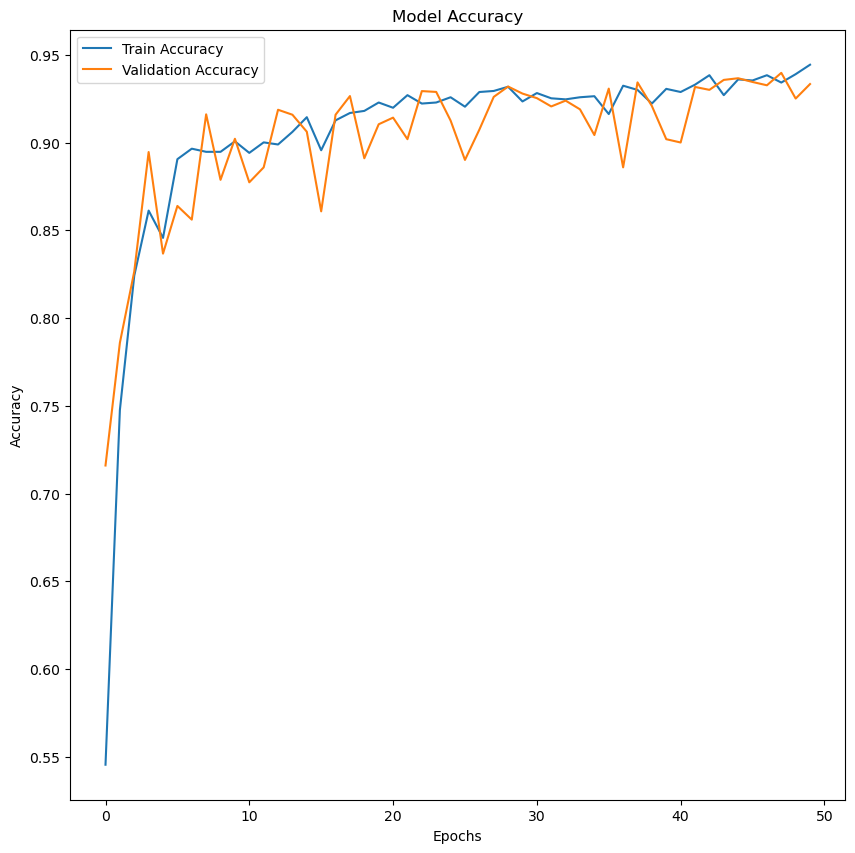

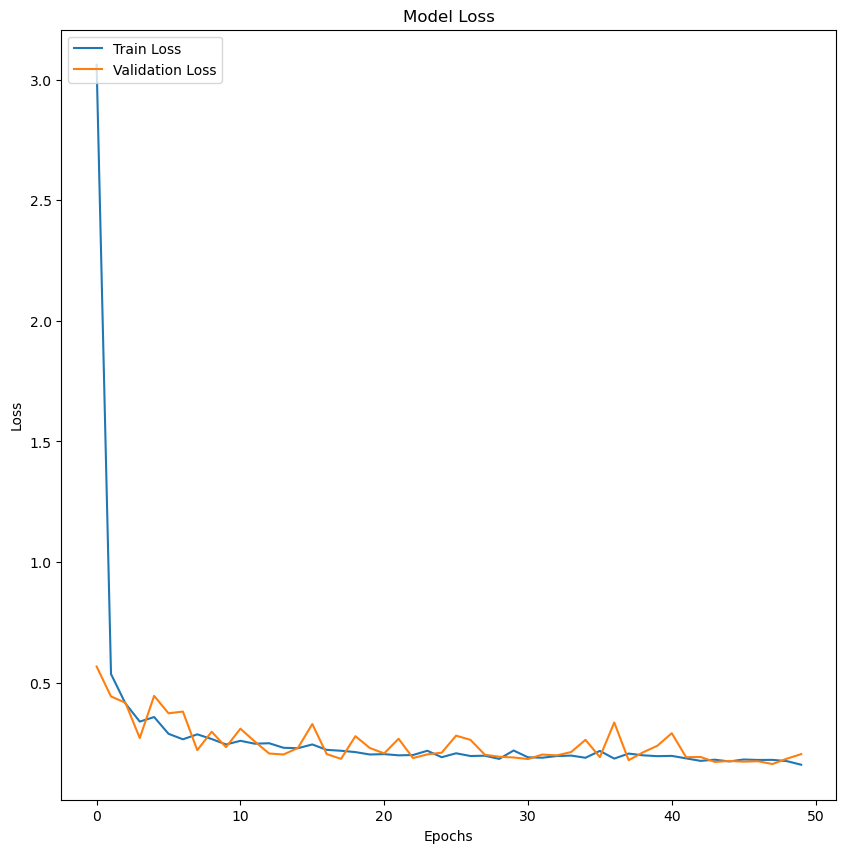

In [43]:
figure = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()


In [44]:
pred = model.evaluate(X_test, Y_test)
print(f'Test Set Accuracy: {pred[1]}')
print(f'Test Set Loss: {pred[0]}')

133/133 [==============================] - 3s 24ms/step - loss: 0.2037 - accuracy: 0.9334
Test Set Accuracy: 0.9333648681640625
Test Set Loss: 0.20370711386203766


In [45]:
import numpy as np

# Assuming Y is a numpy array containing labels (0 for open, 1 for closed)
# and X is a numpy array containing images

# Example data
#Y = np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0])  # Example label array
# Example of corresponding number of images
#X = np.random.rand(10, 28, 28, 3)  # Example of 10 images with shape (28, 28, 3)

# Count the number of occurrences of each class
unique_classes, counts = np.unique(Y, return_counts=True)

# Print the number of images in each class
for cls, count in zip(unique_classes, counts):
    print(f"Number of images in class {cls}: {count}")

# If you want to save the counts in a dictionary for further use
class_counts = dict(zip(unique_classes, counts))
print(class_counts)


Number of images in class 0: 824
Number of images in class 1: 880
{0: 824, 1: 880}


In [31]:
from sklearn.metrics import classification_report

# Assuming you have already defined and trained your model
ypred = model.predict(X_test)  # Uncomment this line
# ypred = np.argmax(ypred, axis=1)  # Uncomment this line if needed (multiclass)

# Convert predicted probabilities to binary predictions (0 or 1)
ypred = (ypred > 0.5).astype(int)

# Assuming Y_test contains binary labels (0 or 1)
Y_test_pred = Y_test


133/133 [==============================] - 2s 18ms/step


In [46]:
from sklearn.metrics import classification_report

# Assuming you have already defined and trained your model
# ypred = model.predict(X_test)
# ypred = np.argmax(ypred, axis=1)

# Convert predicted probabilities to binary predictions (0 or 1)
ypred = (ypred > 0.5).astype(int)

# Assuming Y_test contains binary labels (0 or 1)
# Y_test_pred = np.argmax(Y_test, axis=1)  <-- This line is unnecessary for binary classification
Y_test_pred = Y_test

# Print classification report
print(classification_report(Y_test_pred, ypred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2042
           1       0.92      0.96      0.94      2190

    accuracy                           0.94      4232
   macro avg       0.94      0.94      0.94      4232
weighted avg       0.94      0.94      0.94      4232



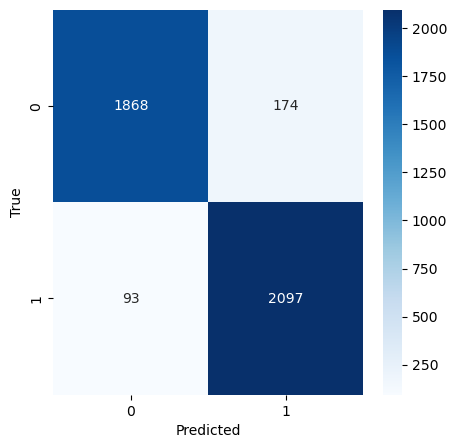

In [47]:
from sklearn.metrics import confusion_matrix

# Assuming you have already defined and trained your model
# ypred = model.predict(X_test)
# ypred = (ypred > 0.5).astype(int)
# Y_test_pred = Y_test

# Calculate confusion matrix
matrix = confusion_matrix(Y_test_pred, ypred)

# Optionally, you can visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [55]:
model.save('driver_drowsiness_detection.h5')

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
labels = ['Closed', 'Open']
img_closed1 = cv2.imread('archive/TestSet/TestSet/Closed/257.jpg')
img_closed2 = cv2.imread('archive/TestSet/TestSet/Closed/300.jpg')
img_open1 = cv2.imread('archive/TestSet/TestSet/Opened/786.jpg')
img_open2 = cv2.imread('archive/TestSet/TestSet/Opened/1788.jpg')


img_closed1 = cv2.resize(img_closed1, (32, 32))
img_closed2 = cv2.resize(img_closed2, (32, 32))
img_open1 = cv2.resize(img_open1, (32, 32))
img_open2 = cv2.resize(img_open2, (32, 32))

img_closed1 = np.array(img_closed1)
img_closed2 = np.array(img_closed2)
img_open1 = np.array(img_open1)
img_open2 = np.array(img_open2)

img_closed1 = np.expand_dims(img_closed1, axis=0)
img_closed2 = np.expand_dims(img_closed2, axis=0)
img_open1 = np.expand_dims(img_open1, axis=0)
img_open2 = np.expand_dims(img_open2, axis=0)

In [50]:
ypred_closed1 = model.predict(img_closed1)
ypred_closed2 = model.predict(img_closed2)
ypred_open1 = model.predict(img_open1)
ypred_open2 = model.predict(img_open2)

1/1 [==============================] - 0s 43ms/step


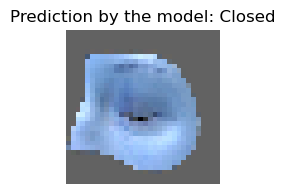

In [51]:
figure = plt.figure(figsize=(2, 2))
img_closed1 = np.squeeze(img_closed1, axis=0)
plt.imshow(img_closed1)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_closed1[0], axis=0)]}')
plt.show()

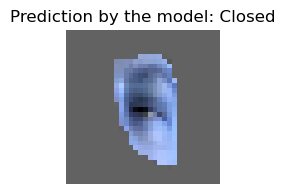

In [38]:
figure = plt.figure(figsize=(2, 2))
img_closed2 = np.squeeze(img_closed2, axis=0)
plt.imshow(img_closed2)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_closed2[0], axis=0)]}')
plt.show()

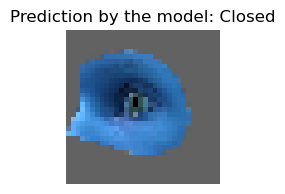

In [52]:
figure = plt.figure(figsize=(2, 2))
img_open1 = np.squeeze(img_open1, axis=0)
plt.imshow(img_open1)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_open1[0], axis=0)]}')
plt.show()

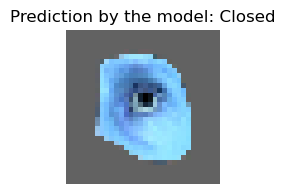

In [40]:
figure = plt.figure(figsize=(2, 2))
img_open2 = np.squeeze(img_open2, axis=0)
plt.imshow(img_open2)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_open2[0], axis=0)]}')
plt.show()

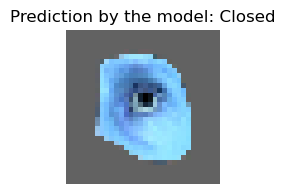

In [41]:
figure = plt.figure(figsize=(2, 2))
plt.imshow(img_open2)  # No need to squeeze
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_open2[0], axis=0)]}')
plt.show()
